In [1]:
from pfd_toolkit import load_reports, LLM, Screener, Extractor
from pydantic import BaseModel, Field

In [2]:
reports = load_reports(end_date="2025-11-30",
                       refresh=True)

print(f"In total, there were {len(reports)} PFD reports published between July 2013 and November 2025.")

In total, there were 6043 PFD reports published between July 2013 and November 2025.


In [3]:
from dotenv import load_dotenv
import os

# Load OpenAI API key from local environment
load_dotenv("api.env")
openai_api_key = os.getenv("OPENAI_API_KEY")

# Initialise LLM client
llm_client = LLM(api_key=openai_api_key, 
                 max_workers=30, 
                 model="gpt-4.1-mini",
                 seed=123, 
                 temperature=0, 
                 timeout=60)

In [ ]:
# Set up Screener
search_query = "Road traffic deaths **only**."
screener = Screener(llm=llm_client, reports=reports)

road_traffic_reports = screener.screen_reports(search_query=search_query)

In [4]:
extractor = Extractor(reports=reports,
                      llm=llm_client,
                      include_investigation=False)

3252719 total tokens
2978593 total tokens within the threshold.


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Report length distribution'}, xlabel='Tokens count', ylabel='Number of reports'>)

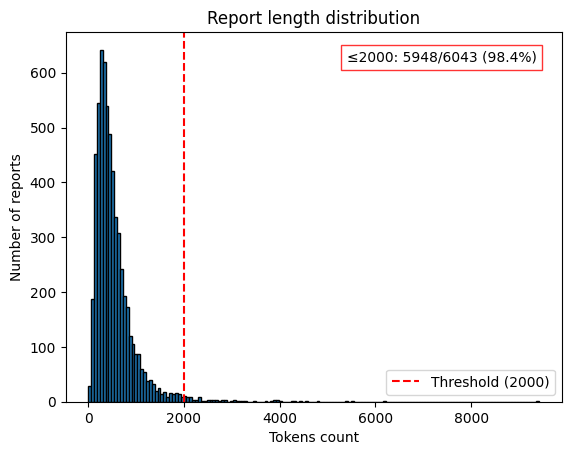

In [10]:
extractor.count(measure="tokens", as_="hist", threshold=2000)